Create a dataset of images using the profile pictures of my colleagues at the Insight Centre for Data Analytics

In [1]:
import requests # http://docs.python-requests.org/
from pattern import web # https://www.clips.uantwerpen.be/pages/pattern-web
from BeautifulSoup import BeautifulSoup
import json
import time
import urllib
import os

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Get the images from Insight's website:

In [3]:
local_path = 'images/'

In [4]:
def get_profile_pics():

    main_url = 'https://insight-centre.org'
    url = '{}/about/team'.format(main_url)

    data = []
    page = 1

    for page in range(1, 24): # 23 pages

        params = dict(page=page)
        r = requests.get(url, params=params)
        print "Page", page, r.url

        # Get DOM
        dom = web.Element(r.text)
        # Content with the people to BeautifulSoup format
        bs = BeautifulSoup(str(dom.by_class('view-content')[1]))
        # Get the profile pics we are insterested in
        images = [ link.findChild('img') for link in bs.findAll('a') if link.findChild('img') is not None ]
        # To JSON
        for image in images:
            src = image['src']
            width = image['width'] if 'width' in image else 0
            height = image['height'] if 'height' in image else 0
            title = image['title']
            if "'s picture" in title:
                title = title.split("'s picture")[0].title()
            # Download image
            name = title.lower().replace(' ', '-')
            filename = os.path.join(local_path, name)
            urllib.urlretrieve(src, filename)
            data.append({
                'name': title,
                'src': src,
                'filename': filename,
                'width': width,
                'height': height,
            })
        time.sleep(2)

        page += 1
        
    return data

In [5]:
# data = get_profile_pics()

In [6]:
# with open('data.json', 'w') as outfile:
#     json.dump(data, outfile)

In [7]:
data = json.load(open('data.json'))

In [8]:
data[0]

{u'filename': u'images/safina-ara',
 u'height': 0,
 u'name': u'Safina Ara',
 u'src': u'https://insight-centre.org/sites/default/files/styles/user_picture/public/pictures/picture-1395-1433254427.jpg?itok=DafRKsvW',
 u'width': 0}

In [9]:
img = mpimg.imread(data[0]['filename'])
img.shape

(100, 76, 3)

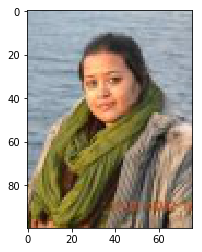

In [10]:
plt.imshow(img)

In [11]:
len(data)

411

In [12]:
ls images/ | wc -l

     411


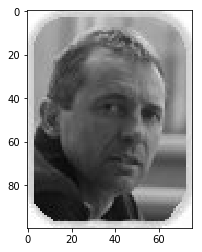

In [13]:
# My supervisor
plt.imshow(mpimg.imread(data[343]['filename']))

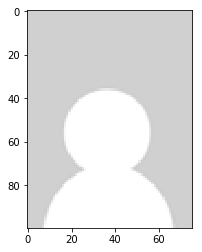

In [14]:
# Me
img_me = mpimg.imread(data[8]['filename'])
plt.imshow(img_me)

Some people including me have no profile picture yet and a default one is shown instead

In [15]:
names = set()
for d in data:
    names.add(d['name'])
# names

In [16]:
len(names)

411

In [17]:
names_dict = { i: name for i, name in enumerate(names) }
id_to_names = { v: k for k, v in names_dict.items() }

In [18]:
id_to_names['David Azcona'], id_to_names['Safina Ara']

(266, 315)

In [19]:
from keras.preprocessing import image

x = []
y = []

for d in data:
    
    # Image to array
    img = image.load_img(d['filename'], target_size=(224, 224))
    x.append(image.img_to_array(img))
    
    # Name
    target = id_to_names[d['name']]
    y.append(target)

x = np.array(x)
y = np.array(y)

Using TensorFlow backend.


In [20]:
x.shape, y.shape

((411, 224, 224, 3), (411,))

Save those numpy arrays!

In [21]:
outfile = 'insight_x'
# np.save(outfile, x)

In [22]:
ls insight_x.npy

insight_x.npy


In [23]:
outfile = 'insight_y'
# np.save(outfile, y)

In [24]:
ls insight_y.npy

insight_y.npy
